In [7]:
!pip install numpy pandas matplotlib seaborn scikit-learn

  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl.metadata (52 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp313-cp313-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.1.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.3.1-py3-none-any.whl.metadata (5.6 kB)
Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl (11.0 MB)
Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.3-cp313-cp313-wi


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

PARTIE 1

In [21]:
df = load_iris(as_frame=True).frame
print(df.head())
print(df.info())

iris = load_iris()
X = iris.data[:, :4]
y = (iris.target == 0).astype(int)

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...               0.2       0
3                4.6               3.1  ...               0.2       0
4                5.0               3.6  ...               0.2       0

[5 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [29]:

#cout logistique
def logistic_loss(X, y, w):
    n = X.shape[0]
    z = y * (X @ w)
    loss = (1/n) * np.sum(np.log(1 + np.exp(-z)))
    return loss

#sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#gradient
def gradient(x, y, w):
    prediction = sigmoid(x @ w)
    grad = (prediction - y) * x
    return grad

In [31]:
def sgd(X, y, alpha, n_iter, random_state=42):
    np.random.seed(random_state)
    n = X_train.shape[1]
    w = np.random.randn(n) * 0.01

    cost_history = []

    for i in range(n_iter):
        #echantillon aléatoire
        idx = np.random.randint(0, len(y))
        x_i = X[idx]
        y_i = y[idx]

        # Maj
        grad = gradient(x_i, y_i, w)
        w = w - alpha * grad

        cost = logistic_loss(X_train, y_train, w)
        cost_history.append(cost)
    return w, cost_history
    

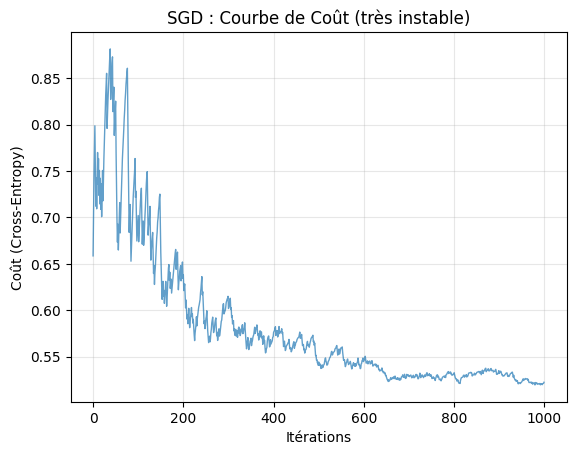

In [35]:
w_sgd, cost_history_sgd = sgd(X_train, y_train, alpha=0.01, n_iter=1000, random_state=42)

plt.plot(cost_history_sgd, alpha=0.7, linewidth=1)
plt.xlabel('Itérations')
plt.ylabel('Coût (Cross-Entropy)')
plt.title('SGD : Courbe de Coût (très instable)')
plt.grid(True, alpha=0.3)

Le SGD utilise un seul echantillon a chaque iteration pour estimer le gradient, creant ainsi du bruit dans les mises a jour. Le gradient calcule sur un seul point varie d'une iteration a l'autre => oscillations. Par contre, le GD utilise tout le dataset, pour estimer le gradient. 

        PARTIE 2

In [37]:
from sklearn.datasets import fetch_california_housing

In [45]:
data = fetch_california_housing()
X = data.data
y = data.target

print(data.DESCR)
print(X.shape, y.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [46]:
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X, y, test_size=0.2, random_state=42)

Temps d'exécution SGD sans standardisation: 0.0169 secondes


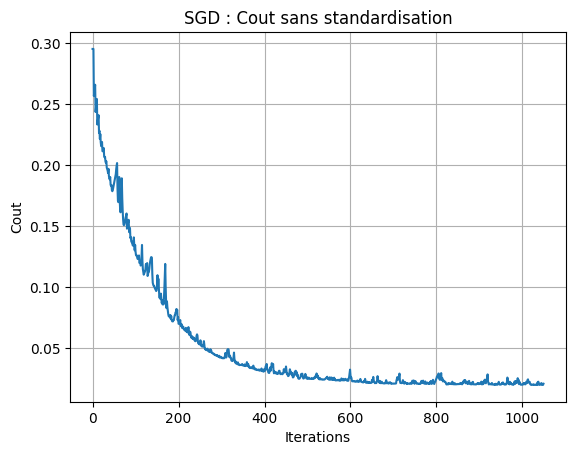

In [104]:
def sgd_regressor(X, y, alpha, epochs):
    n, d = X.shape
    
    w = np.zeros(d)
    loss_history = []
    
    for epoch in range(epochs):
        indices = np.random.permutation(n)
        for i in range(n):
            xi = X[indices[i]]
            yi = y[indices[i]]

            gradient_w = 2 * (np.dot(xi, w) - yi) * xi    
            w -= alpha * gradient_w

            loss = np.mean((X @ w - y) ** 2)
            loss_history.append(loss)

    return w, loss_history

import time
start1 = time.time()
w_sgd, loss_history = sgd_regressor(X_train, y_train, alpha=0.001, epochs=10)
stop1 = time.time() - start1
print(f"Temps d'exécution SGD sans standardisation: {stop1:.4f} secondes")

plt.plot(loss_history)
plt.xlabel('Iterations')
plt.ylabel('Cout')
plt.title('SGD : Cout sans standardisation')
plt.grid(True)
plt.show()

Temps d'exécution SGD avec standardisation: 0.0144 secondes


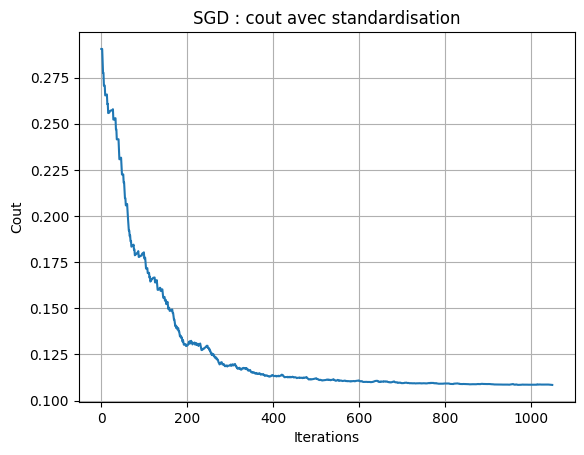

In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

import time
start2 = time.time()
w_sgd_scaled, loss_history_scaled = sgd_regressor(X_train_scaled, y_train, alpha=0.001, epochs=10)
stop2 = time.time() - start2
print(f"Temps d'exécution SGD avec standardisation: {stop2:.4f} secondes")

plt.plot(loss_history_scaled)
plt.xlabel('Iterations')
plt.ylabel('Cout')
plt.title('SGD : cout avec standardisation')
plt.grid(True)
plt.show()

Sans standardisation, les features ont des échelles différentes. Le gradient pointe alors dans des directions tres distinctes ce qui ralentit la convergence. Avec la standardisation, les lignes de niveau deviennent plus proches, permettant au gradient de pointer directement vers le minimum et d'y converger plus rapidement. 

        PARTIE 3

In [107]:
def sgd_regressor_batch(X, y, alpha, batch_size, epochs):
    n, d = X.shape
    
    w = np.zeros(d)
    loss_history = []
    
    for epoch in range(epochs):
        indices = np.random.permutation(n)
        n_batches = int(np.ceil(n / batch_size))

        for batch_idx in range(n_batches):
            start_idx = batch_idx * batch_size
            end_idx = min(start_idx + batch_size, n)
            
            X_batch = X[indices[start_idx:end_idx]]
            y_batch = y[indices[start_idx:end_idx]]
            gradient_w = 2 * (np.dot(X_batch, w) - y_batch) @ X_batch / len(y_batch)    
            w -= alpha * gradient_w

            loss = np.mean((X @ w - y) ** 2)
            loss_history.append(loss)

    return w, loss_history


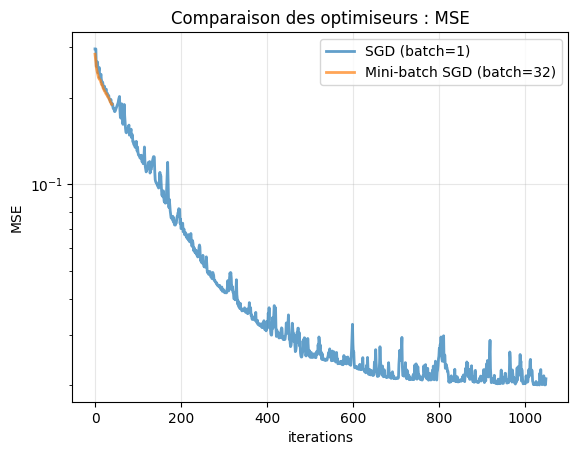

In [111]:
w_batch, loss_history_batch = sgd_regressor_batch(X_train, y_train, alpha=0.001, batch_size=32, epochs=10)


plt.plot(loss_history, label='SGD (batch=1)', linewidth=2, alpha=0.7)
plt.plot(loss_history_batch, label='Mini-batch SGD (batch=32)', linewidth=2, alpha=0.7)
plt.xlabel('iterations')
plt.ylabel('MSE')
plt.title('Comparaison des optimiseurs : MSE')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

Un pas d'apprentissage trop grand peut causer :
    
    • OSCILLATIONS : Le modèle oscille autour du minimum sans jamais converger.

    • INSTABILITÉ : Avec le bruit du SGD, un grand alpha amplifie les variations aléatoires, rendant l'entraînement chaotique.

Les GPUs sont conçus pour les calculs massifs :

    • SGD pur (batch_size=1) : traite un seul exemple a la fois utilisant massivement les milliers de coeurs du GPU.

    • Mini-batch (batch_size=32) : traite 32 exemples simultanément, exploitant le parallelisme du GPU.

    • Résultat : Le mini-batch peut être 10-100x plus rapide sur GPU que le SGD pur, tout en offrant une meilleure estimation du gradient.

Le shuffling consiste a melanger aleatoirement l'ordre des exemples avant chaque epoque d'entrainement. C'est crucial pour le SGD car :

        • EVITER LE SUR-APPRENTISSAGE : Si les donnees sont ordonnees le modele apprendra des patterns dans cet ordre specifique, ce qui biaise l'apprentissage.

        • MEILLEURE GENERALISATION : Le melange garantit que chaque mini-batch est representatif de la distribution globale des donnees.